In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Phase 1 – Data Understanding & Setup

In [2]:
df = pd.read_csv("titanic.csv")

In [3]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


| Column          | Meaning                                                                    |
| --------------- | -------------------------------------------------------------------------- |
| **PassengerId** | A unique ID assigned to each passenger (just a serial number).             |
| **Survived**    | Target variable — `0` = did not survive, `1` = survived.                   |
| **Pclass**      | Passenger class: `1` = 1st (luxury), `2` = 2nd (mid), `3` = 3rd (economy). |
| **Name**        | Passenger’s full name.                                                     |
| **Sex**         | Gender (`male` / `female`).                                                |
| **Age**         | Age in years.                                                              |
| **SibSp**       | Number of siblings or spouses aboard with the passenger.                   |
| **Parch**       | Number of parents or children aboard with the passenger.                   |
| **Ticket**      | Ticket number.                                                             |
| **Fare**        | Ticket price.                                                              |
| **Cabin**       | Cabin number (if assigned).                                                |
| **Embarked**    | Port of embarkation: `C` = Cherbourg, `Q` = Queenstown, `S` = Southampton. |


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [5]:
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [6]:
# check for total missing values
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Our goal is to predict Survived (0 or 1).

This means:
Output is categorical (two possible values: survived or not).
This is a binary classification problem.

### Phase 2 — Data Cleaning

- Decide what to do with missing Age, Cabin, Embarked values.
- Check for weird or inconsistent values.
- Prepare dataset for analysis.

**2.1 Handle Missing Values**

In [7]:
df['Age'].median()

28.0

In [8]:
df['Age'].fillna(df['Age'].median(), inplace = True)

C:\Users\saiha\AppData\Local\Temp\ipykernel_24784\3612560828.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace = True)


In [9]:
df.drop(columns=['Cabin'], inplace=True)  # more than half is missing in this column. drop it.

In [10]:
# Categorical variable with 3 possible values (C, Q, S). Fill with most common value (mode).

print(df['Embarked'].mode()[0])

df['Embarked'].fillna(df['Embarked'].mode()[0], inplace = True)

S


C:\Users\saiha\AppData\Local\Temp\ipykernel_24784\2066622475.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace = True)


**2.2 Remove Irrelevant Columns**

In [11]:
df.drop(columns = ['PassengerId', 'Ticket'], inplace=True)

**2.3 Check if all missing values are handled**

In [12]:
df.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [13]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


### Phase 3 – EDA (Exploratory Data Analysis)

In [14]:
# dataset summary after cleaning

# Basic shape
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

# Summary of numeric columns
print("\nNumeric Summary:")
print(df.describe())

# Unique values in categorical columns
print("\nUnique Values in Categorical Columns:")
for col in df.select_dtypes(include=['object']).columns:
    if col == 'Name':
        continue
    print(f"{col}: {df[col].unique()}")


Rows: 891, Columns: 9

Numeric Summary:
         Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.361582    0.523008    0.381594   32.204208
std      0.486592    0.836071   13.019697    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   22.000000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   35.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200

Unique Values in Categorical Columns:
Sex: ['male' 'female']
Embarked: ['S' 'C' 'Q']


In [15]:
# survival rate

survival_rate = df['Survived'].mean() * 100
print(f'{survival_rate:.2f}')

38.38


**observe trends**

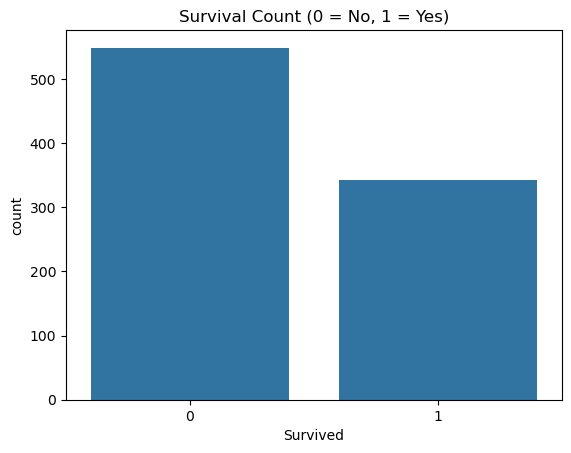

In [16]:
# 1. Survival Count
sns.countplot(x='Survived', data=df)
plt.title('Survival Count (0 = No, 1 = Yes)')
plt.show()

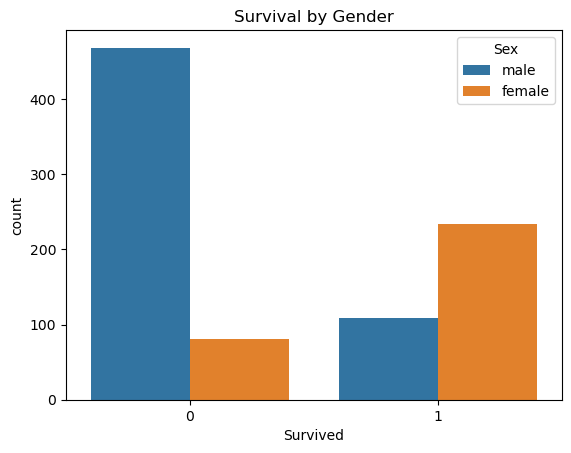

In [17]:
# 2. Survival by gender
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Survival by Gender')
plt.show()

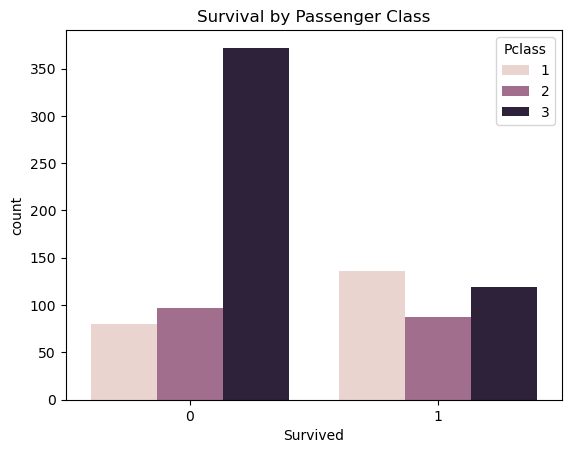

In [18]:
# 3. Survival by Passenger Class
# it was told that 1st class has the pass for life boats
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title('Survival by Passenger Class')
plt.show()

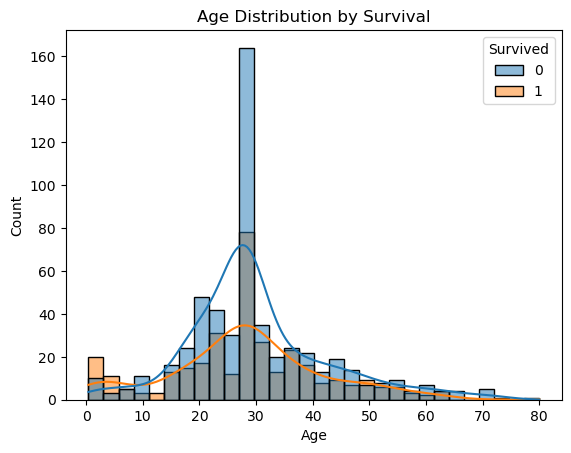

In [19]:
# 4. Age Distribution by Survival
sns.histplot(data=df, x='Age', hue='Survived', kde=True)
plt.title('Age Distribution by Survival')
plt.show()

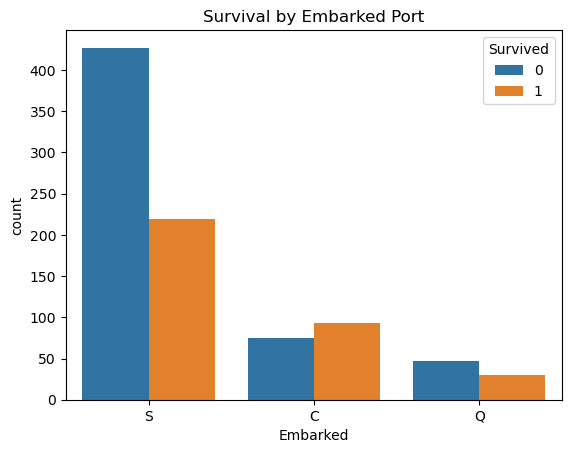

In [20]:
# 5. Survival by Port of Embarkation
sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title('Survival by Embarked Port')
plt.show()

**Expected Insights from Visuals**

- Gender: Women had much higher survival rates (because of "women and children first" policy).
- Class: 1st-class passengers had higher survival rates than 3rd-class.
- Age: Younger passengers had slightly higher survival.
- Embarked: Passengers from Cherbourg had better odds.

### Phase 4 – Feature Engineering

Goal: Create new, more informative features from the existing data to help the model learn better.

*4.1 – Extract Passenger Title from Name*

*Titles like Mr, Mrs, Miss, Master often carry survival patterns. Passenger names contain titles like Mr, Mrs, Miss, Master which often correlate with survival (e.g., women & children had higher survival rates)*

In [21]:
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [22]:
title_mapping = {
    "Mlle": "Miss", "Ms": "Miss", "Mme": "Mrs",
    "Lady": "Rare", "Countess": "Rare", "Capt": "Rare",
    "Col": "Rare", "Don": "Rare", "Dr": "Rare", "Major": "Rare",
    "Rev": "Rare", "Sir": "Rare", "Jonkheer": "Rare", "Dona": "Rare"
}

df['Title'] = df['Title'].replace(title_mapping)
print(df['Title'].value_counts())

Title
Mr        517
Miss      185
Mrs       126
Master     40
Rare       23
Name: count, dtype: int64


*.2 - Family size*

*SibSp (siblings/spouses aboard) + Parch (parents/children aboard) tells us family connections. Bigger families may stick together → survival patterns.*

In [24]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

In [25]:
df['FamilySize']

0      2
1      2
2      1
3      2
4      1
      ..
886    1
887    1
888    4
889    1
890    1
Name: FamilySize, Length: 891, dtype: int64